# IBM Quantum Certificate Theory

In [1]:
from qiskit import qiskit, QuantumCircuit
import matplotlib
import math as m
# Create a quantum circuit with 1 qubit and 1 classical bit.
qc = QuantumCircuit(2, 2)


# Create a statevector to initialize
state_vector_q0 =[1/m.sqrt(2),1/m.sqrt(2)]
state_vector_q1 =[1/m.sqrt(2),1/m.sqrt(2)]
qc.initialize(state_vector_q0, 0)
qc.initialize(state_vector_q1, 1)

# Apply a NOT gate on qubit 0.
# qc.x(0)
# qc.x(1)
# qc.cx(0,2)
# qc.cx(1,2)
# qc.ccx(0,1,2)


# Measure qubit 0.
qc.measure(range(2), range(2))
backend = qiskit.BasicAer.get_backend('qasm_simulator')
job = qiskit.execute(qc, backend, shots=1024)
print(job.result().get_counts())

{'10': 260, '00': 265, '01': 252, '11': 247}


In [2]:
qc = QuantumCircuit(2,2)

state_vector_q0 = [3/4, m.sqrt(7)/4]
state_vector_q1 = [2/3, m.sqrt(5)/3]
qc.initialize(state_vector_q0,0)
qc.initialize(state_vector_q1,1)
qc.measure(range(2),range(2))
backend = qiskit.Aer.get_backend("statevector_simulator")
job = qiskit.execute(qc, backend, shots=1024)
print(job.result().get_counts())


{'10': 327, '11': 218, '00': 273, '01': 206}


In [84]:
qc = QuantumCircuit(2,2)

state_vector_q0 = [3/4, m.sqrt(7)/4]
state_vector_q1 = [2/3, m.sqrt(5)/3]
qc.initialize(state_vector_q0,0)
qc.initialize(state_vector_q1,1)
qc.measure(range(2),range(2))
backend = qiskit.Aer.get_backend("qasm_simulator")
job = qiskit.execute(qc, backend, shots=1024)
print(job.result().get_counts())


{'00': 232, '11': 274, '10': 334, '01': 184}


In [4]:
from qiskit import qiskit, QuantumCircuit, assemble, Aer
import matplotlib
import math as m
# Create a quantum circuit with 1 qubit and 1 classical bit.
qc = QuantumCircuit(1, 1)


# Create a statevector to initialize
# state_vector_q0 =[1/m.sqrt(2),1/m.sqrt(2)]
# # state_vector_q1 =[1/m.sqrt(2),1/m.sqrt(2)]
# qc.initialize(state_vector_q0, 0)
# qc.initialize(state_vector_q1, 1)

# Apply a NOT gate on qubit 0.
qc.ry(3*m.pi/4,0)
# qc.x(1)
# qc.cx(0,2)
# qc.cx(1,2)
# qc.ccx(0,1,2)


# Measure qubit 0.
#qc.measure(range(2), range(2))
sv_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
job = sv_sim.run(qobj)
check = job.result().get_statevector()
print(job.result().get_statevector())

Statevector([0.38268343+0.j, 0.92387953+0.j],
            dims=(2,))


In [61]:
check[0]**2

(0.1464466094067263+0j)

## Load State Vector

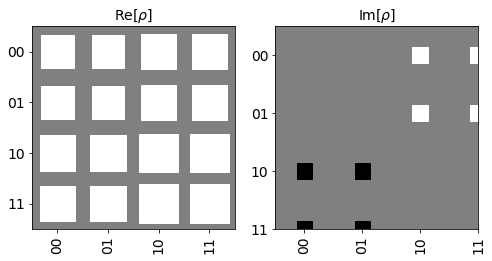

In [9]:
from qiskit import qiskit, execute, QuantumCircuit, BasicAer
from qiskit.quantum_info import Statevector
from qiskit.circuit.random import random_circuit

# Create a random circuit.
qc = random_circuit(2, 4)

sv = Statevector.from_label('00') # 00 corresponds to the number of qubits
ev = sv.evolve(qc)

# We can plot using either method!
# plot_state_city(ev)
ev.draw('hinton')

In [66]:
qc.depth()

4

In [68]:
qc.draw()

┌─────┐    ┌────────────┐     ┌───┐
q_0: ───┤ Tdg ├────┤ U1(1.5859) ├──■──┤ H ├
     ┌──┴─────┴───┐└───┬───┬────┘┌─┴─┐└─┬─┘
q_1: ┤ Rx(3.1805) ├────┤ S ├─────┤ Y ├──■──
     └────────────┘    └───┘     └───┘

## Drawing a Quantum Circuit

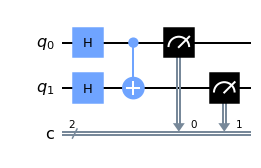

In [3]:
qc = QuantumCircuit(2,2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure(range(2),range(2))
qc.draw("mpl")

## Plotting a Bloch Sphere

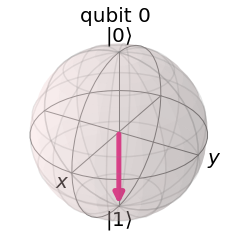

In [14]:
from qiskit import QuantumCircuit, qiskit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector

qc = QuantumCircuit(1,1)
qc.x(0)

simulator = Aer.get_backend('statevector_simulator')
job = qiskit.execute(qc,simulator)

result = job.result()

output_state = result.get_statevector(qc)
figure = plot_bloch_multivector(output_state)
figure

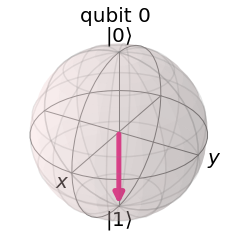

In [15]:
sv = Statevector(qc)
sv.draw("bloch")


## Initializing a Qubit in Superposition

In [25]:
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1,1)

statevector = [1/m.sqrt(2),1j/m.sqrt(2)]
qc.initialize(statevector,0)
qc.measure(0,0)
backend = qiskit.Aer.get_backend("qasm_simulator")

job = qiskit.execute(qc,backend)

plots = job.result().get_counts()
figure = plot_histogram(plots)
print(plots)


{'0': 527, '1': 497}


In [30]:
statevector

[0.7071067811865475, 0.7071067811865475j]

## Initializing a Qubit to a Variable Degree

In [31]:
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(1,1)
prob = 1/3
value = 1-prob

statevector = [m.sqrt(prob),m.sqrt(value)]
qc.initialize(statevector,0)
qc.measure(0,0)
backend = qiskit.Aer.get_backend("qasm_simulator")

job = qiskit.execute(qc,backend,shots=1024)

plots = job.result().get_counts()
figure = plot_histogram(plots)
print(plots)

{'0': 348, '1': 676}


In [33]:
figure.savefig('histogram2.png')

In [34]:
target = 2/3
threshold = 0.03
count = job.result().get_counts()['1']
diff = abs(target - count/1024)
print('{} < {} = {}'.format(diff, threshold, diff < threshold))


0.00651041666666663 < 0.03 = True


## Collapsing a Superposition

In [57]:
from math import sqrt

qc = QuantumCircuit(1)
state_vector = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(state_vector, 0)
# qc.measure_all()

sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(str(state))

Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


In [54]:
from math import sqrt

qc = QuantumCircuit(1)
state_vector = [0.+1.j/sqrt(2), 1/sqrt(2)+0.j]
qc.initialize(state_vector, 0)

# Append classical registers and measure gates to the circuit.
qc.measure_all()

sim = Aer.get_backend('qasm_simulator')
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print(str(state))

Statevector([0.+1.j, 0.+0.j],
            dims=(2,))


## Entanglement

In [68]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)

backend = Aer.get_backend('statevector_simulator')
# job = execute(qc,backend,shots=1024)
qobj = assemble(qc)
result = backend.run(qobj).result()

# result = job.result().get_counts()
output_state = result.get_statevector(qc)
print(output_state)
figure = plot_histogram(result.get_counts())
figure.savefig("Histogram_BellState.png")

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
{'00': 527, '11': 497}


In [66]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

simulator = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
result = simulator.run(qobj).result()
output_state = result.get_statevector(qc)
print(output_state)
figure = plot_histogram(result.get_counts())
figure.savefig('histogram-bellstate.png')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [70]:
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
# qc.measure([0, 1], [0, 1])

job = qiskit.execute(qc, qiskit.BasicAer.get_backend('qasm_simulator'))
print(job.result().get_counts())

{'01': 538, '10': 486}


## Creating 4 Bell States

In [72]:
def four_bell_states():
    """
    Create all 4 Bell states.
    https://quantumcomputing.stackexchange.com/a/2260
    """

    # [00, 11] positive
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    execute_bell(qc, '00-11')

    # [01, 10] positive
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.x(1)
    execute_bell(qc, '01-10')

    # [00, 11] negative
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.z(0)
    execute_bell(qc, '11-00')

    # [01, 10] negative
    qc = QuantumCircuit(2)
    qc.h(0)
    qc.cx(0, 1)
    qc.z(0)
    qc.x(1)
    execute_bell(qc, '10-01')

def execute_bell(qc, name):
    simulator = Aer.get_backend('statevector_simulator')
    qobj = assemble(qc)
    result = simulator.run(qobj).result()
    output_state = result.get_statevector(qc)
    print(output_state)
    figure = plot_histogram(result.get_counts())
    figure.savefig('bellstate-{}.png'.format(name))

In [73]:
four_bell_states()

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
Statevector([ 0.70710678+0.j, -0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))
Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
             -0.        +0.j],
            dims=(2, 2))


## Unitary Matrix


In [55]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)

sv_sim = Aer.get_backend('unitary_simulator')
job = qiskit.execute(qc, sv_sim)
output_vector = job.result().get_unitary(qc, decimals=1)
print(output_vector)

Operator([[ 0.7+0.j,  0.7+0.j],
          [-0.7-0.j,  0.7+0.j]],
         input_dims=(2,), output_dims=(2,))


## Check Qiskit version

In [81]:
from qiskit import qiskit
qiskit.__version__

'0.20.0'

In [82]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.20.0', 'qiskit-aer': '0.10.4', 'qiskit-ignis': '0.7.0', 'qiskit-ibmq-provider': '0.19.0', 'qiskit-aqua': None, 'qiskit': '0.36.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

## Running on a Real Quantum Computer with IBMQ

In [89]:
from qiskit import IBMQ
from qiskit import qiskit, execute, QuantumCircuit

# Start by loading your IBMQ API key.
IBMQ.enable_account('Your_IBMQ_API_key')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [96]:
# Retrieve a list of providers.
IBMQ.providers() # [<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

# Load the provider either by name or by group state.
provider = IBMQ.get_provider(hub='ibm-q')
provider = IBMQ.get_provider(group='open')

# Display the list of available backends.
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [97]:
# Filter by actual quantum computers that are operational.
provider.backends(simulator=False, operational=True)

# Filter by an advanced query.
provider.backends(filters=lambda x: x.configuration().n_qubits >= 10 and not x.configuration().simulator and x.status().operational==True)

# Select the first backend.
backend = provider.backends()[2] # <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>

# Print version information about the backend.
backend.name() # ibmqx2
backend.version # 1
backend.provider() # <AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [99]:
qc = QuantumCircuit(2, 2)

qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

job = execute(qc, backend)
job.status() # <JobStatus.RUNNING: 'job is actively running'>
job.status() # <JobStatus.DONE: 'job has successfully run'>
job.result().get_counts()

{'00': 1714, '01': 77, '10': 131, '11': 2078}

In [100]:
from qiskit.tools import job_monitor

backend2 = qiskit.BasicAer.get_backend('qasm_simulator')
backend2.name() # qasm_simulator
backend2.version # 1
backend2.provider().backends() # [<QasmSimulatorPy('qasm_simulator')>, <StatevectorSimulatorPy('statevector_simulator')>, <UnitarySimulatorPy('unitary_simulator')>]

job = qiskit.execute(qc, backend2)

job_monitor(job) # Problem status of the running job
# Job Status: job has successfully run

job.status()
# <JobStatus.DONE: 'job has successfully run'>

job.result().get_counts()

Job Status: job has successfully run


{'00': 502, '11': 522}

In [14]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state_vector = Statevector.from_label('00')
state_vector_ev = state_vector.evolve(qc)
state_vector_ev.draw('latex')

<IPython.core.display.Latex object>

### Create and save locally important plots

In [15]:
from qiskit.visualization import plot_state_city
figure = state_vector_ev.draw('qsphere')
figure.savefig('state-vector-qsphere.png')

figure2 = state_vector_ev.draw('hinton')
figure2.savefig('state-vector-hinton.png')

# Plot the state vector as a densitymatrix.
figure3 = plot_state_city(state_vector_ev, title='Density Matrix',color=['orange', 'black'])
figure3.savefig('plot-density-matrix.png')

In [16]:
from qiskit import BasicAer
from qiskit.visualization import plot_bloch_vector, plot_bloch_multivector
figure4 = plot_bloch_vector([0,0.25,1])
figure4.savefig('plot-bloch-vector.png')

figure5 = state_vector_ev.draw('bloch')
figure5.savefig('plot-bloch-state-vector.png')

result = qiskit.execute(qc, BasicAer.get_backend('statevector_simulator')).result()
sim_state_vector = result.get_statevector()
figure6 = plot_bloch_multivector(sim_state_vector)
figure6.savefig('plot-bloch-multivector.png')

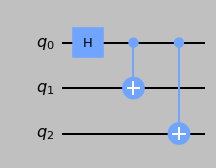

In [6]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx(0, 1)
ghz.cx(0, 2)
ghz.draw('mpl')
ghz.draw('text')
# ghz.draw('latex')

# Draw the circuit with reverse bit order.
ghz.draw('mpl', reverse_bits=True)

# Draw the circuit with barriers hidden.
ghz.draw('mpl', plot_barriers=False)

# Draw the circuit with a specific style.
style = {'backgroundcolor': 'silver'}
ghz.draw('mpl', style=style)

## Exporting QASM

In [19]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.x(0)
qc.cx(0, 1)
qc.barrier()
qc.measure([0, 1], [0, 1])

str = qc.qasm()
print(str)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
x q[0];
cx q[0],q[1];
barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



## Plotting Gate Maps and Error Rates

In [24]:
from qiskit import IBMQ
from qiskit.visualization import plot_gate_map, plot_error_map

provider = IBMQ.enable_account(token='Your_IBMQ_API_token')
backend = provider.backends(simulator=False)[1]

print('Using backend {}'.format(backend.name())) # ibmq_santiago, etc

# Plot a Gate Map for the device.
fig = plot_gate_map(backend)
fig.savefig('gate_map.png')

# Plot an Error Map for the device.
fig = plot_error_map(backend)
fig.savefig('error_map.png')

Using backend ibmq_santiago


In [25]:
backend

<IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>

## Creating Phase on Qubits

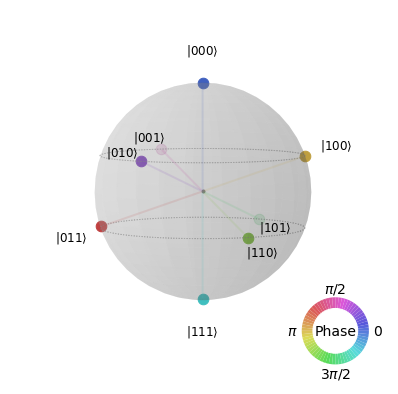

In [26]:
from qiskit import qiskit, QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector

qr = QuantumRegister(3)
qc = QuantumCircuit(qr)

# Apply Z-axis phases to the qubits.
qc.h(qr)
qc.s(qr[0])
qc.t(qr[1])
qc.z(qr[2])

# Retrieve a state vector.
sv = Statevector.from_label('000') # or .from_int(0, 2**3)
sv_ev = sv.evolve(qc)
sv_ev.draw('qsphere')

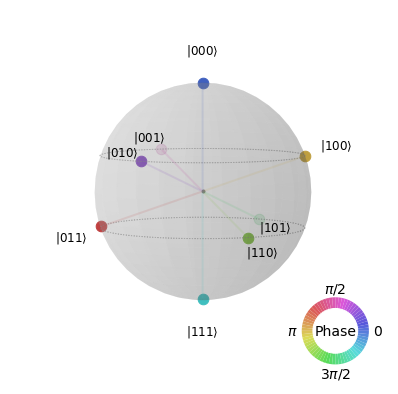

In [27]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend, shots=1024)
result = job.result()
sv_ev2 = result.get_statevector(qc)
plot_state_qsphere(sv_ev2)

In [32]:
from qiskit.quantum_info import state_fidelity, average_gate_fidelity,process_fidelity
from qiskit import Aer
qc1 = QuantumCircuit(2)
qc2 = QuantumCircuit(2)

qc1.h(0)
qc1.h(1)
qc2.h([0, 1])

backend = Aer.get_backend('statevector_simulator')

sv1 = execute(qc1, backend).result().get_statevector(qc1)
sv2 = execute(qc2, backend).result().get_statevector(qc2)

print(state_fidelity(sv1, sv2))

1.0000000000000009


In [33]:
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import SGate
import numpy as np

gate1 = Operator(SGate())
gate2 = np.exp(1j / 2) * gate1

print(average_gate_fidelity(gate1, gate2))
print(process_fidelity(gate1, gate2))

1.0
1.0


In [34]:
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library import SGate, ZGate

gate1 = Operator(SGate())
gate2 = Operator(ZGate())

print(average_gate_fidelity(gate1, gate2))
print (process_fidelity(gate1, gate2))

0.6666666666666666
0.5000000000000001


In [35]:
qc1 = QuantumCircuit(1)
qc2 = QuantumCircuit(1)

qc1.h(0)
qc1.s(0)

qc2.h(0)
qc2.t(0)
qc2.t(0)

print(average_gate_fidelity(qc1, qc2))
print(process_fidelity(qc1, qc2))

0.9999999999999997
0.9999999999999994


c:\Users\pantousasa\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\quantum_info\operators\measures.py:381: UserWarning: Treating array input as a SuperOp object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")
c:\Users\pantousasa\AppData\Local\Programs\Python\Python310\lib\site-packages\qiskit\quantum_info\operators\measures.py:381: UserWarning: Treating array input as a Operator object
  warnings.warn(f"Treating array input as a {fallback_class.__name__} object")


In [36]:
qc3 = QuantumCircuit(1)
qc4 = QuantumCircuit(1)

qc3.h(0)
qc3.z(0)

qc4.h(0)
qc4.s(0)
qc4.s(0)

print(average_gate_fidelity(qc3, qc4))
print(process_fidelity(qc3, qc4))

0.9999999999999997
0.9999999999999996


In [37]:
print(average_gate_fidelity(qc1, qc3))

0.6666666666666665


In [38]:
print(process_fidelity(qc1, qc3))

0.4999999999999998


In [39]:
from qiskit.quantum_info import DensityMatrix

matrix1 = [[1+0.j, 0.5+0.j], [0.5+0.j, 1+0.j]]
matrix2 = [[0.5+0.j, 1+0.j], [0.5+0.j, 1+0.j]]

matrix = DensityMatrix(matrix1)
matrix.tensor(matrix2)

DensityMatrix([[0.5 +0.j, 1.  +0.j, 0.25+0.j, 0.5 +0.j],
               [0.5 +0.j, 1.  +0.j, 0.25+0.j, 0.5 +0.j],
               [0.25+0.j, 0.5 +0.j, 0.5 +0.j, 1.  +0.j],
               [0.25+0.j, 0.5 +0.j, 0.5 +0.j, 1.  +0.j]],
              dims=(2, 2))


In [46]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.z(1)

# Package the circuit into a custom gate.
custom_gate = qc.to_gate()

# Re-use the custom gate in a new circuit.
qc2 = QuantumCircuit(3)
# Place the custom gate across qubits two and three.
qc2.append(custom_gate, [1, 2])
qc2.draw()

q_0: ────────────────
     ┌──────────────┐
q_1: ┤0             ├
     │  circuit-282 │
q_2: ┤1             ├
     └──────────────┘

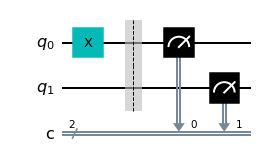

In [43]:
qc1 = QuantumCircuit(2, 2)
qc1.x(0)

qc2 = QuantumCircuit(2, 2)
qc2.barrier()
qc2.measure([0,1], [0,1])

qc3 = qc1.compose(qc2)

qc3.draw('mpl')

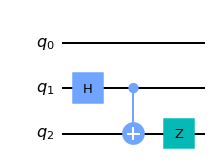

In [47]:
qc2.decompose().draw('mpl')

In [48]:
from qiskit.circuit.library import YGate

qc_enhance = QuantumCircuit(2)
qc_enhance.append(YGate().control(1), [0, 1])
qc_enhance.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ Y ├
     └───┘

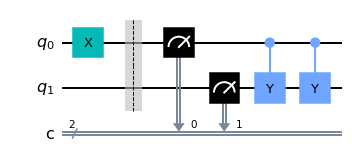

In [50]:
qc3 = qc3.compose(qc_enhance)

qc3.draw('mpl')

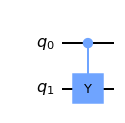

In [53]:
from qiskit.circuit.library import YGate

qc_enhance = QuantumCircuit(2)
qc_enhance.append(YGate().control(1), [0, 1])
qc_enhance.draw('mpl')

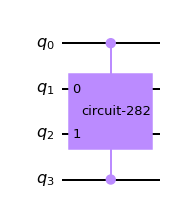

In [61]:
qc_multi = QuantumCircuit(4)
qc_multi.append(custom_gate.control(2), [0, 3, 1, 2]) # 0, 3 are control inputs and 1, 2 are gate target positions.
qc_multi.draw(output='mpl')

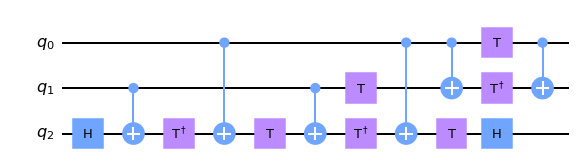

In [76]:
qc = QuantumCircuit(3)
qc.ccx(0,1,2)

qc.decompose().draw('mpl')

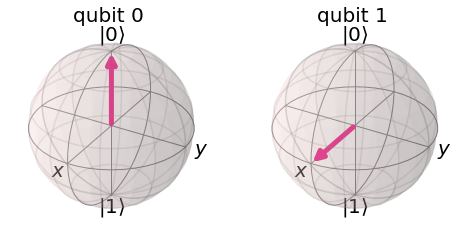

In [74]:
import math as m
vector =([1/m.sqrt(2),0,1/m.sqrt(2),0])
plot_bloch_multivector(vector)

## Test codes

In [14]:
from qiskit import Aer, execute
qc = QuantumCircuit(1)
qc.h(0)
simulator = Aer.get_backend('unitary_simulator')
job = execute(qc,simulator)
result = job.result()
outputstate = result.get_unitary(qc,2)
print(outputstate)

Operator([[ 0.71+0.j,  0.71-0.j],
          [ 0.71+0.j, -0.71+0.j]],
         input_dims=(2,), output_dims=(2,))


In [34]:
from qiskit.circuit import QuantumRegister, ClassicalRegister
import math as m
# qr = QuantumRegister(2)
# a = QuantumRegister(2)
# cr = ClassicalRegister(4)
qc = QuantumCircuit(2)
qc.crz(m.pi,0,1)
qc.cp(m.pi,0,1)

simulator = Aer.get_backend("unitary_simulator")
result = execute(qc,simulator).result()
counts = result.get_unitary(qc)
print(counts)



Operator([[ 1.0000000e+00+0.j,  0.0000000e+00+0.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j],
          [ 0.0000000e+00+0.j,  0.0000000e+00-1.j,  0.0000000e+00+0.j,
            0.0000000e+00+0.j],
          [ 0.0000000e+00+0.j,  0.0000000e+00+0.j,  1.0000000e+00+0.j,
            0.0000000e+00+0.j],
          [-0.0000000e+00+0.j, -0.0000000e+00+0.j, -0.0000000e+00+0.j,
           -1.2246468e-16-1.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [36]:
from qiskit import BasicAer
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator')>,
 <StatevectorSimulatorPy('statevector_simulator')>,
 <UnitarySimulatorPy('unitary_simulator')>]

In [24]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg c[2];
h q[0];
barrier q[0],q[1];
z q[1];
barrier q[0],q[1];
measure q[0] -> c[0];
measure q[1] -> c[1];



In [40]:
qc = QuantumCircuit(1,1)

qc.h(0)

simulator = Aer.get_backend('unitary_simulator')
job = qiskit.execute(qc,simulator)

result = job.result()

output_state = result.get_unitary(qc)
print(output_state)

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


In [43]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *

# Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

In [44]:
from qiskit.quantum_info import Statevector

bell_0 = QuantumCircuit(2)
bell_0.h(0)
bell_0.cx(0,1)

sv = Statevector.from_label('00') #we used the .from_label(), we could also use .from_int(), for more check docs!
sv_ev = sv.evolve(bell_0) #we evolve this initial state through our circuit
sv_ev.draw('latex') #we print out the state via. LaTeX

<IPython.core.display.Latex object>

In [46]:
from qiskit.quantum_info import Statevector

bell_0 = QuantumCircuit(2)
bell_0.x(1)
bell_0.h(0)
bell_0.cx(0,1)

sv = Statevector.from_label('00') #we used the .from_label(), we could also use .from_int(), for more check docs!
sv_ev = sv.evolve(bell_0) #we evolve this initial state through our circuit
sv_ev.draw('latex') #we print out the state via. LaTeX

<IPython.core.display.Latex object>

In [47]:
from qiskit.quantum_info import Statevector

bell_0 = QuantumCircuit(2)
bell_0.x(0)
bell_0.h(0)
bell_0.cx(0,1)

sv = Statevector.from_label('00') #we used the .from_label(), we could also use .from_int(), for more check docs!
sv_ev = sv.evolve(bell_0) #we evolve this initial state through our circuit
sv_ev.draw('latex') #we print out the state via. LaTeX

<IPython.core.display.Latex object>

In [48]:
bell_3 = QuantumCircuit(2)
bell_3.h(0)
bell_3.x(1)
bell_3.cx(0,1)
bell_3.z(1)

sv_ev_3 = sv.evolve(bell_3)
sv_ev_3.draw('latex')

<IPython.core.display.Latex object>

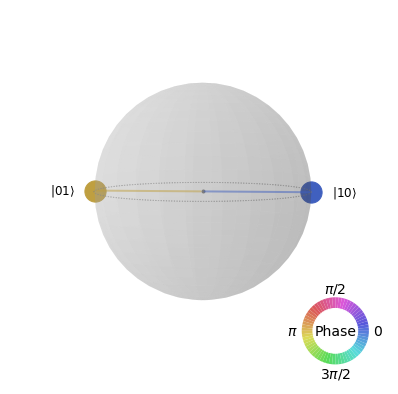

In [49]:
sv_ev_3.draw('qsphere') 

In [50]:
#we have seen how to get the bell states and also get their Statevector objects
#let's move to another famous state and its circuit, the GHZ
#and let's actually see our circuits!

ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx([0,0],[1,2]) #notice we didn't need to specify 2x ghz.cx() by utilizing our []s

ghz.draw('text') #we could also draw this with matplotlib by specifying 'mpl'

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [51]:
sv = Statevector.from_int(0,2**3) #here we employed the .from_int()
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

In [52]:
sv = Statevector.from_label("000") #here we employed the .from_int()
sv_ev = sv.evolve(ghz)
sv_ev.draw('latex')

<IPython.core.display.Latex object>

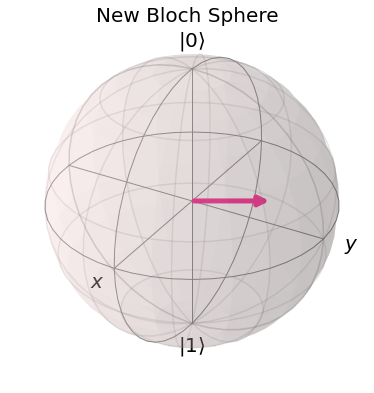

In [91]:
from qiskit.visualization import plot_bloch_vector
%matplotlib inline

plot_bloch_vector([1/2,m.sqrt(3)/2,1/2], title="New Bloch Sphere")

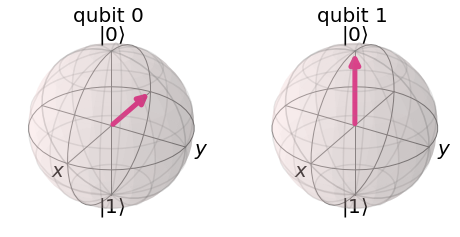

In [94]:
#here we create 2 registers explicitly before creating our circuit
#and we get our statevector the same way
#then we plot its bloch_multivector

q_a = QuantumRegister(1,'q_a')
q_b = QuantumRegister(1, 'q_b')
qc = QuantumCircuit(q_a, q_b)
qc.h(0) 
qc.z(0) 

back = BasicAer.get_backend('ibmq_quito')
result = execute(qc, back).result()
sv = result.get_statevector()
plot_bloch_multivector(sv) #voila!

In [95]:
from qiskit import IBMQ
from qiskit import qiskit, execute, QuantumCircuit

# Start by loading your IBMQ API key.
IBMQ.enable_account('Your_IBMQ_API_key')

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [98]:
IBMQ.providers() # [<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

# Load the provider either by name or by group state.
provider = IBMQ.get_provider(hub='ibm-q')
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [104]:
#here we create 2 registers explicitly before creating our circuit
#and we get our statevector the same way
#then we plot its bloch_multivector

q_a = QuantumRegister(1,'q_a')
q_b = QuantumRegister(1, 'q_b')
qc = QuantumCircuit(q_a, q_b)
qc.h(0) 
qc.z(0) 

back = provider.get_backend('ibmq_qasm_simulator')
result = execute(qc, back).result()
sv = result.get_counts()
plot_histogram(sv)

QiskitError: 'No counts for experiment "0"'

In [102]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx([0,0],[1,2]) #notice we didn't need to specify 2x ghz.cx() by utilizing our []s

backend_uni = BasicAer.get_backend('unitary_simulator') #we get the unitary simulator
U = execute(ghz,backend_uni).result().get_unitary(decimals=3) #we skip a whole lotta steps!
#instead of rounding with np.around(), you can also use 'decimals' in get_unitary like above
U

array([[ 0.707+0.j,  0.707-0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j, -0.707+0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j,  0.707-0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
        -0.707+0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.707+0.j,
         0.707-0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.707+0.j, -0.707+0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j],
       [ 0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j,  0.   +0.j,  0.   +0.j,  0.   +0.j,
         0.   +0.j,  0.   +0.j,  0.   +0.j]])

In [105]:
ghz = QuantumCircuit(3)
ghz.h(0)
ghz.cx([0,0],[1,2]) #notice we didn't need to specify 2x ghz.cx() by utilizing our []s

backend_uni = BasicAer.get_backend('statevector_simulator') #we get the unitary simulator
U = execute(ghz,backend_uni).result().get_statevector(decimals=3) #we skip a whole lotta steps!
#instead of rounding with np.around(), you can also use 'decimals' in get_unitary like above
U

array([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
       0.   +0.j, 0.707+0.j])

In [115]:
from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
qc = QuantumCircuit(2)
v = [1/sqrt(2), 0, 0, 1/sqrt(2)]
qc.initialize(v,[0,1])
qc.barrier([0,1])

simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
print(statevector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


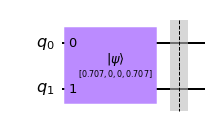

In [116]:
qc.draw('mpl')

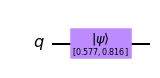

In [117]:
#Testing for fidelity with initializer
a = 1/np.sqrt(3) #we can define a state ourselves, we could also get a random state, check the docs!
desired_state = [a,np.sqrt(1-a**2)] #state is defined such that it is a valid one!
q_reg = QuantumRegister(1,'q')
qc = QuantumCircuit(q_reg)
qc.initialize(desired_state,0) #as simple as this!
qc.draw('mpl')

In [118]:
#for getting the statevector from the circuit, we employ our old friend
#the .get_statevector via the state-vec sim

back_sv = BasicAer.get_backend('statevector_simulator')
result = execute(qc, back_sv).result()
qc_sv = result.get_statevector(qc)
qc_sv

array([0.57735027+0.j, 0.81649658+0.j])

In [124]:
from qiskit.quantum_info import state_fidelity
state_fidelity(qc_sv,desired_state)

1.0

In [121]:
qc_sv

array([0.57735027+0.j, 0.81649658+0.j])

In [122]:
desired_state

[0.5773502691896258, 0.8164965809277259]

In [125]:
from qiskit.circuit.library import XGate
from qiskit.quantum_info import Operator, average_gate_fidelity, process_fidelity
op_a = Operator(XGate())
op_b = np.exp(1j / 2) * op_a

#these differ only by a phase so the gate and process
#fidelities are expected to be 1

a = average_gate_fidelity(op_a,op_b)
a

1.0

In [126]:
op_b

Operator([[0.        +0.j        , 0.87758256+0.47942554j],
          [0.87758256+0.47942554j, 0.        +0.j        ]],
         input_dims=(2,), output_dims=(2,))

In [127]:
op_a

Operator([[0.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))